# Modelling proportion data using the binomial distribution

本节需要的包：

In [2]:
require(s20x)


载入需要的程辑包：s20x

Warning message:
"程辑包's20x'是用R版本4.2.3 来建造的"


## Binary (Bernoulli) data, odds and log-odds

Here we are considering the situation where the response can only take two possible values. These might be coded in the form of:

- Zeros or ones.
- TRUE or FALSE.
- Yes or No.
- Success or Failure.
- Or any other pair of categorical values.

Bernoulli random variables(伯努利随机变量):

If Y is a Bernoulli random variable with parameter p, then Y will take the value 1 with probability p, and the value 0 with probability 1 - p. Since it is a probability, p must be a value that is between 0 and 1, i.e. $p ∈ [0, 1]$.

很容易表明，伯努利随机变量的平均值为：

$$
E(Y) = p
$$

而且，方差为

$$
Var(Y) = p(1 - p)
$$

### Odds

为了使 glm 对数几率的解释更加容易，我们需要引入 Odds 这个概念，把定义域从 $[0, 1]$ 扩展到 $[0, \infty]$。

Odds 是指事件发生的概率与事件不发生的概率的比值，即：

$$
Odds = \frac{p}{1 - p}
$$

反过来说：

$$
p = \frac{Odds}{1 + Odds}
$$

### Log-odds

Odds 的对数（简称为 log-odds）为：

$$
LogOdds = log(\frac{p}{1 - p})
$$

此时定义域从 $[0, \infty]$ 变为 $[-\infty, \infty]$。

$$
p = \frac{exp(LogOdds)}{1 + exp(LogOdds)}
$$

## Modelling log-odds

Why log-odds?

由于我们的模型对或的值没有限制，所以在设置变量为 $β_0$、$β_1$ 的情况下，$β_0 + β_1 x$ 可以在实线上取任何值。

That is, $\beta_0+\beta_1x\in(-\infty,\infty)$.

$$
\text{Log-Odds}=\beta_0+\beta_1x
$$

Log-Odds can be any real number.

即：

$$
\text{log}\left(\frac{p}{1-p}\right)=\beta_0+\beta_1x
$$

其中p是解释变量x的主体 "成功" 的概率。

This can be re-arranged in the logistic form

$$
p=\frac{exp(\beta_0+\beta_1x)}{1+exp(\beta_0+\beta_1x)}
$$

## Modelling the response when it is binary (ungrouped data) via glm

In [3]:
bb.df <- read.csv("../data/basketball.csv")
head(bb.df, 10)


,distance,gender,basket
,<int>,<chr>,<int>
1,3,M,1
2,1,F,1
3,2,M,1
4,3,M,0
5,1,M,1
6,2,F,1
7,2,F,1
8,1,F,1
9,3,F,0


In [4]:
success.tbl <- xtabs(basket ~ distance + gender, data = bb.df)
success.tbl


        gender
distance  F  M
       1 10 10
       2  6  5
       3  2  1

In [5]:
bb.fit <- glm(
    basket ~ distance * gender,
    family = binomial, # binomial distribution
    data = bb.df
)


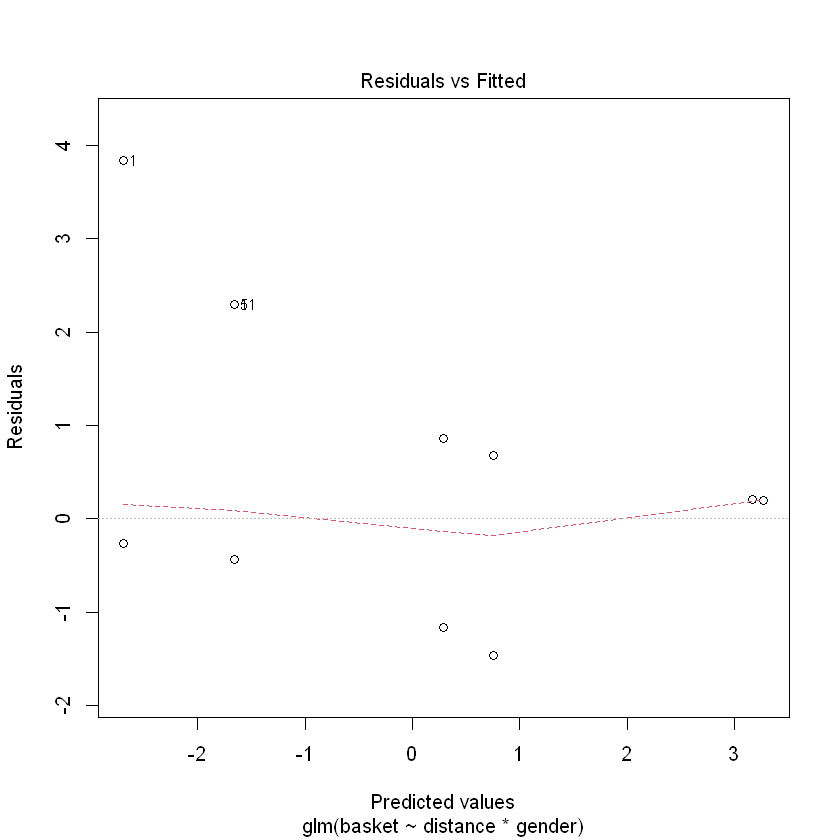

In [6]:
plot(bb.fit, which = 1, lty = 2)


In [7]:
summary(bb.fit)



Call:
glm(formula = basket ~ distance * gender, family = binomial, 
    data = bb.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5106  -0.5900   0.2723   0.2866   2.3474  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)   
(Intercept)        5.5878     1.9050   2.933  0.00335 **
distance          -2.4159     0.8181  -2.953  0.00314 **
genderM            0.6710     2.9235   0.230  0.81847   
distance:genderM  -0.5668     1.3213  -0.429  0.66794   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 82.108  on 59  degrees of freedom
Residual deviance: 46.202  on 56  degrees of freedom
AIC: 54.202

Number of Fisher Scoring iterations: 5


In [8]:
bb.fit1 <- glm(basket ~ distance + gender,
    family = binomial, data = bb.df
)
summary(bb.fit1)



Call:
glm(formula = basket ~ distance + gender, family = binomial, 
    data = bb.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5382  -0.5411   0.2461   0.3219   2.2283  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   6.1469     1.5242   4.033 5.51e-05 ***
distance     -2.6648     0.6364  -4.188 2.82e-05 ***
genderM      -0.5478     0.7486  -0.732    0.464    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 82.108  on 59  degrees of freedom
Residual deviance: 46.392  on 57  degrees of freedom
AIC: 52.392

Number of Fisher Scoring iterations: 5


In [9]:
bb.fit2 <- glm(basket ~ distance, family = binomial, data = bb.df)
summary(bb.fit2)



Call:
glm(formula = basket ~ distance, family = binomial, data = bb.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4118  -0.4818   0.2873   0.2873   2.1029  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)   5.7980     1.4038   4.130 3.63e-05 ***
distance     -2.6310     0.6274  -4.193 2.75e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 82.108  on 59  degrees of freedom
Residual deviance: 46.937  on 58  degrees of freedom
AIC: 50.937

Number of Fisher Scoring iterations: 5


In [10]:
coef(bb.fit2)


(Intercept)    distance 
   5.797968   -2.631033

In [11]:
exp(coef(bb.fit2))
100 * (1 - exp(coef(bb.fit2)))


(Intercept)     distance 
329.62899018   0.07200401

(Intercept)    distance 
-32862.8990     92.7996

In [12]:
(bb.ci2 <- confint(bb.fit2))
100 * (1 - exp(bb.ci2))


Waiting for profiling to be done...



,2.5 %,97.5 %
(Intercept),3.422396,9.037020
distance,-4.103523,-1.568945


,2.5 %,97.5 %
(Intercept),-2964.27509,-840767.86136
distance,98.34856,79.17351


In [13]:
predn.df <- data.frame(distance = 1:3)
bb.logit.pred <- predict(bb.fit2, newdata = predn.df)
bb.logit.pred


1          2          3 
 3.1669343  0.5359009 -2.0951325

In [14]:
plogis(bb.logit.pred)


1         2         3 
0.9595708 0.6308584 0.1095708

In [15]:
predict(bb.fit2, newdata = predn.df, type = "response")


1         2         3 
0.9595708 0.6308584 0.1095708

In [16]:
bb.logit.predses <- predict(bb.fit2, newdata = predn.df, se.fit = TRUE)$se.fit
bb.logit.predses
# Lower and upper bounds of CIs for the log-odds
lower = bb.logit.pred - 1.96 * bb.logit.predses
upper = bb.logit.pred + 1.96 * bb.logit.predses
ci = cbind(lower, upper)
plogis(ci)


1         2         3 
0.8151018 0.3812977 0.6432312

,lower,upper
1,0.82768876,0.9915452
2,0.44733541,0.7830016
3,0.03370361,0.3027157


In [17]:
predictGLM(bb.fit2, newdata = data.frame(distance = 1:3), type = "link")
predictGLM(bb.fit2, newdata = data.frame(distance = 1:3), type = "response")


***Estimates and CIs are on the link scale***



,fit,lwr,upr
1,3.1669343,1.5693642,4.7645045
2,0.5359009,-0.2114289,1.2832308
3,-2.0951325,-3.3558424,-0.8344225


***Estimates and CIs are on the response scale***



,fit,lwr,upr
1,0.9595708,0.82769294,0.9915450
2,0.6308584,0.44733881,0.7829992
3,0.1095708,0.03370437,0.3027108


## Modelling the response when it is binomial (grouped binary data) via glm

In [18]:
# Load dplyr package to manipulate data frames
library(dplyr)
bb.grouped.df = bb.df %>%
    group_by(gender, distance) %>%
    summarize(n = n(), propn = sum(basket) / n)
# Change tibble back to a data frame
bb.grouped.df = data.frame(bb.grouped.df)
bb.grouped.df


`summarise()` has grouped output by 'gender'. You can override using the
`.groups` argument.


gender,distance,n,propn
<chr>,<int>,<int>,<dbl>
F,1,10,1.0
F,2,10,0.6
F,3,10,0.2
M,1,10,1.0
M,2,10,0.5
M,3,10,0.1


这样转换后，虽然结果相同，但我们可以做卡方检验了（手动经历了分组）。

In [19]:
bb.fit3 = glm(propn ~ distance * gender,
    weights = n,
    family = binomial, data = bb.grouped.df
)
summary(bb.fit3)



Call:
glm(formula = propn ~ distance * gender, family = binomial, data = bb.grouped.df, 
    weights = n)

Deviance Residuals: 
      1        2        3        4        5        6  
 0.9063  -0.5354   0.3367   0.8612  -0.4629   0.4376  

Coefficients:
                 Estimate Std. Error z value Pr(>|z|)   
(Intercept)        5.5878     1.9050   2.933  0.00335 **
distance          -2.4159     0.8181  -2.953  0.00314 **
genderM            0.6710     2.9236   0.230  0.81848   
distance:genderM  -0.5668     1.3214  -0.429  0.66795   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 38.2749  on 5  degrees of freedom
Residual deviance:  2.3688  on 2  degrees of freedom
AIC: 20.23

Number of Fisher Scoring iterations: 4


In [20]:
1 - pchisq(2.3688, 2)


[1] 0.3059297

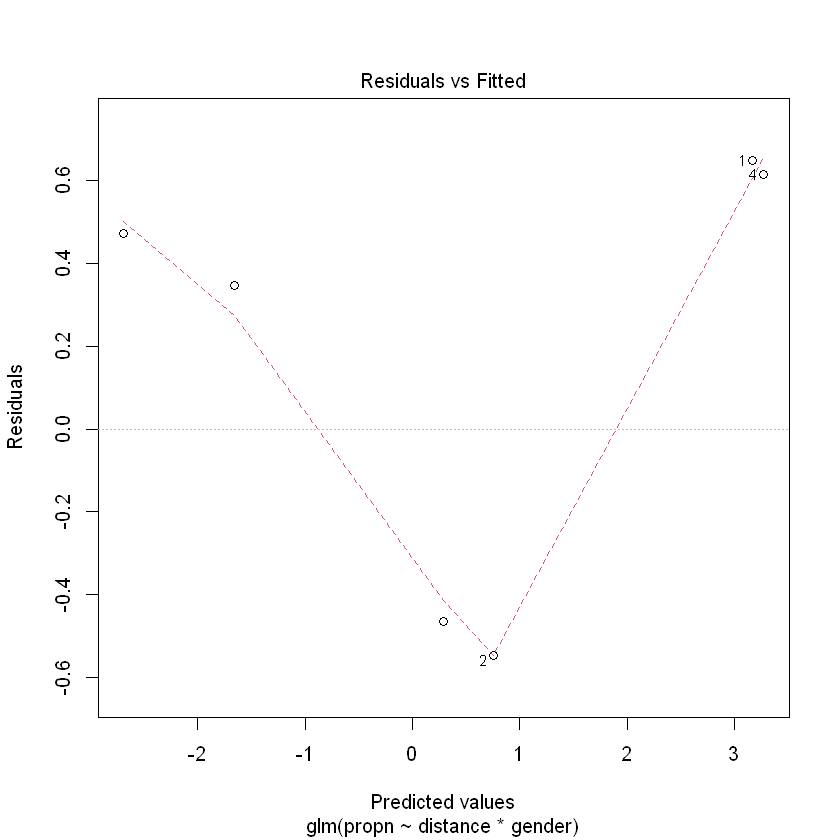

In [21]:
plot(bb.fit3, which = 1, lty = 2)


In [22]:
bb.grouped.df <- transform(bb.grouped.df, success = n * propn, fail = n * (1 - propn))
bb.grouped.df


gender,distance,n,propn,success,fail
<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>
F,1,10,1.0,10,0
F,2,10,0.6,6,4
F,3,10,0.2,2,8
M,1,10,1.0,10,0
M,2,10,0.5,5,5
M,3,10,0.1,1,9


In [ ]:
bb.fit4 = glm(cbind(success, fail) ~ distance * gender,
    family = binomial,
    data = bb.grouped.df
)
summary(bb.fit4)


## Example 1: Space shuttle Challenger accident

The NASA space shuttle Challenger broke up during launch on the cold morning of 28 January 1986. Most of the crew survived the initial break-up, but are believed to have been killed when the crew capsule hit the ocean at high speed. 1986年1月28日的寒冷早晨，美国宇航局的挑战者号航天飞机在发射过程中解体。大多数机组人员在最初的解体过程中幸存下来，但据信在机组人员舱高速撞向海洋时被杀死。

In [24]:
Space.df <- read.table("../data/ChallengerShuttle.txt", head = TRUE)
Space.df$Temp
Space.df$Failure


[1] 66 70 69 68 67 72 73 70 57 63 70 78 67 53 67 75 70 81 76 79 75 76 58

[1] 0 1 0 0 0 0 0 0 1 1 1 0 0 2 0 0 0 0 0 0 2 0 1

In [25]:
Space.gfit = glm(cbind(Failure, 6 - Failure) ~ Temp,
    family = binomial,
    data = Space.df
)
summary(Space.gfit)



Call:
glm(formula = cbind(Failure, 6 - Failure) ~ Temp, family = binomial, 
    data = Space.df)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-0.95227  -0.78299  -0.54117  -0.04379   2.65152  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)  
(Intercept)  5.08498    3.05247   1.666   0.0957 .
Temp        -0.11560    0.04702  -2.458   0.0140 *
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 24.230  on 22  degrees of freedom
Residual deviance: 18.086  on 21  degrees of freedom
AIC: 35.647

Number of Fisher Scoring iterations: 5


In [ ]:
predictGLM(Space.gfit, newdata = data.frame(Temp = 31), type = "response")


In [ ]:
6 * predictGLM(Space.gfit, newdata = data.frame(Temp = 31), type = "response")
